<a href="https://colab.research.google.com/github/MridulaRPanicker/ICT_Python_Assignments/blob/main/Intermediate_Assessment2_Anylics_Vidya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
loan_train = pd.read_csv('/content/drive/MyDrive/ICT_DSA_Course_Programs/Data_toWork/train_analytics_vidya.csv')
loan_test = pd.read_csv('/content/drive/MyDrive/ICT_DSA_Course_Programs/Data_toWork/test_analytics_vidya.csv')

In [180]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [181]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [182]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [183]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [184]:
loan_train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [185]:
loan_test.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [186]:
# I'm considering both train and test dataset for initial preprocessing together.
# Since we have missing values in multiple features, we need to first handle the missing values.
# for all the categorical features, I am going to use "MODE" and for all the numerical features I am goin to use "MEDIAN"
# This will help in preserving all the data points which are available for training the model.

In [187]:
# "MODE" imputation for categorical features.

category_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']
for col in category_columns:
  loan_train[col] = loan_train[col].fillna(loan_train[col].mode()[0])  # imputing 'MODE' for both input train& test dataset
  loan_test[col] = loan_test[col].fillna(loan_test[col].mode()[0])

print(loan_train[category_columns].isnull().sum())
print(loan_test[category_columns].isnull().sum())

Gender            0
Married           0
Dependents        0
Self_Employed     0
Credit_History    0
dtype: int64
Gender            0
Married           0
Dependents        0
Self_Employed     0
Credit_History    0
dtype: int64


In [188]:
# Before handling the missing values in numerical features, I am going to combine the ApplicantIncome & CoapplicantIncome to get the Total income
# Then I will drop Applicant income and coapplicant income to avoid redundancy


# created new feature Total_income
loan_train['Total_Income'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']
loan_test['Total_Income'] = loan_test['ApplicantIncome'] + loan_test['CoapplicantIncome']

# Dropping old features from both train&test datasets
loan_train = loan_train.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
loan_test = loan_test.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)



In [189]:
loan_train.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,0
Property_Area,0


In [190]:
loan_test.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
LoanAmount,5
Loan_Amount_Term,6
Credit_History,0
Property_Area,0


In [191]:
# Both train and test dataset have missing values in Loan Amount and Loan Amount Term.
# goin to use "Median" to impute missing values in these features in both train& test datasets

numeric_columns = ['LoanAmount', 'Loan_Amount_Term']
for col in numeric_columns:
  loan_train[col] = loan_train[col].fillna(loan_train[col].median())  # imputing 'MODE' for both input train& test dataset
  loan_test[col] = loan_test[col].fillna(loan_test[col].median)

print(loan_train[numeric_columns].isnull().sum())
print(loan_test[numeric_columns].isnull().sum())

LoanAmount          0
Loan_Amount_Term    0
dtype: int64
LoanAmount          0
Loan_Amount_Term    0
dtype: int64


In [192]:
loan_test.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Property_Area,0


In [193]:
# Checking the skewness of the features to confirm whether the data needs transformation before proceeding

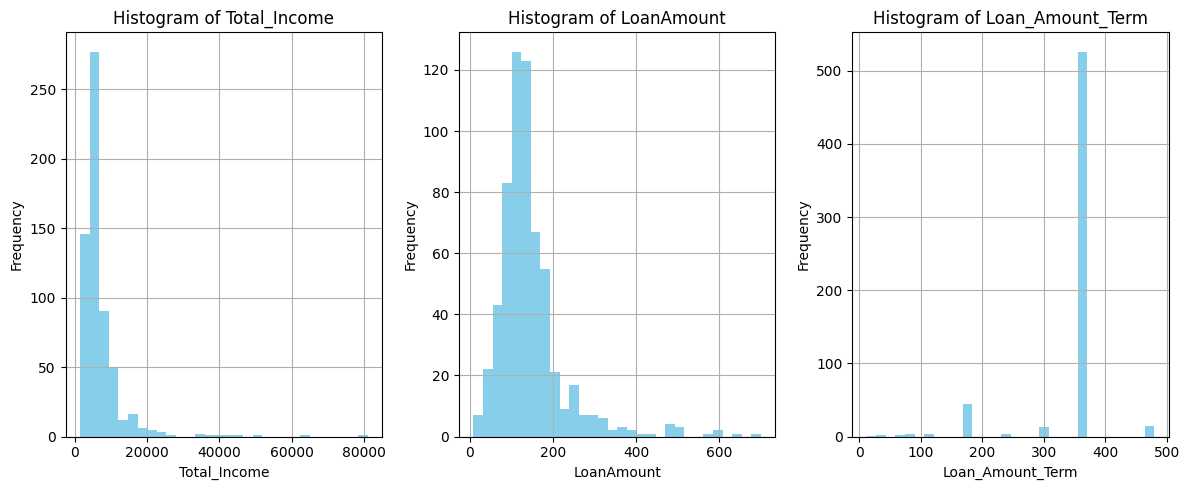

In [194]:
histogram_features = ['Total_Income', 'LoanAmount', 'Loan_Amount_Term']


plt.figure(figsize=(12, 5))

for i, col in enumerate(histogram_features):
    plt.subplot(1, 3, i+1)
    loan_train[col].hist(bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [195]:
# Histogram gave a clear picture of all the numerical columns. Total_income & Loan_Amount are skewed data.
# To normalise the skewness need to use log-transformation on Total_income & Loan_Amount
# Loan_amount_term are time period to repay the loan. So not changing anything in this feature

In [196]:
# Did log transformation
loan_train['Total_Income_log'] = np.log(loan_train['Total_Income'])
loan_train['LoanAmount_log'] = np.log(loan_train['LoanAmount'])

# Dropped original features
loan_train = loan_train.drop(['Total_Income', 'LoanAmount'], axis=1)

# checked result
print(loan_train[['Total_Income_log', 'LoanAmount_log', 'Loan_Amount_Term']].head())

   Total_Income_log  LoanAmount_log  Loan_Amount_Term
0          8.674026        4.852030             360.0
1          8.714568        4.852030             360.0
2          8.006368        4.189655             360.0
3          8.505323        4.787492             360.0
4          8.699515        4.948760             360.0


In [197]:
loan_test['LoanAmount'] = pd.to_numeric(loan_test['LoanAmount'], errors='coerce')


actual_median = loan_test['LoanAmount'].median()
loan_test['LoanAmount'] = loan_test['LoanAmount'].fillna(actual_median)

loan_test['LoanAmount_log'] = np.log(loan_test['LoanAmount'])
loan_test['Total_Income_log'] = np.log(loan_test['Total_Income'])

In [198]:
loan_test['Loan_Amount_Term'] = pd.to_numeric(loan_test['Loan_Amount_Term'], errors='coerce')


actual_median = loan_test['Loan_Amount_Term'].median()
loan_test['Loan_Amount_Term'] = loan_test['Loan_Amount_Term'].fillna(actual_median)



In [199]:
loan_test = loan_test.drop(['Total_Income','LoanAmount'], axis=1)


In [200]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income_log
0,LP001015,Male,Yes,0,Graduate,No,360.0,1.0,Urban,4.700480,8.651724
1,LP001022,Male,Yes,1,Graduate,No,360.0,1.0,Urban,4.836282,8.428581
2,LP001031,Male,Yes,2,Graduate,No,360.0,1.0,Urban,5.337538,8.824678
3,LP001035,Male,Yes,2,Graduate,No,360.0,1.0,Urban,4.605170,8.494129
4,LP001051,Male,No,0,Not Graduate,No,360.0,1.0,Urban,4.356709,8.094378


In [201]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.674026,4.852030
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.699515,4.948760


In [202]:
# Applying Label encoding for all the binary features in both Train and Test dataset

from sklearn.preprocessing import LabelEncoder

binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

le = LabelEncoder()
for col in binary_cols:
    loan_train[col] = le.fit_transform(loan_train[col])

print(loan_train[binary_cols].head())

   Gender  Married  Education  Self_Employed  Loan_Status
0       1        0          0              0            1
1       1        1          0              0            0
2       1        1          0              1            1
3       1        1          1              0            1
4       1        0          0              0            1


In [203]:
loan_train = pd.get_dummies(loan_train, columns=['Property_Area', 'Dependents'], drop_first=True)



In [204]:
loan_train.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income_log,LoanAmount_log,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,0,0,360.0,1.0,1,8.674026,4.852030,False,True,False,False,False
1,LP001003,1,1,0,0,360.0,1.0,0,8.714568,4.852030,False,False,True,False,False
2,LP001005,1,1,0,1,360.0,1.0,1,8.006368,4.189655,False,True,False,False,False
3,LP001006,1,1,1,0,360.0,1.0,1,8.505323,4.787492,False,True,False,False,False
4,LP001008,1,0,0,0,360.0,1.0,1,8.699515,4.948760,False,True,False,False,False


In [205]:

binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']

le = LabelEncoder()
for col in binary_cols:
    loan_test[col] = le.fit_transform(loan_test[col])

loan_test = pd.get_dummies(loan_test, columns=['Property_Area', 'Dependents'], drop_first=True)


In [206]:
loan_test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_Income_log,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,LP001015,1,1,0,0,360.0,1.0,4.700480,8.651724,False,True,False,False,False
1,LP001022,1,1,0,0,360.0,1.0,4.836282,8.428581,False,True,True,False,False
2,LP001031,1,1,0,0,360.0,1.0,5.337538,8.824678,False,True,False,True,False
3,LP001035,1,1,0,0,360.0,1.0,4.605170,8.494129,False,True,False,True,False
4,LP001051,1,0,1,0,360.0,1.0,4.356709,8.094378,False,True,False,False,False


In [207]:
# Training the model with the training data

In [208]:
# Save IDs for later. For submission I need the IDs. So preserving it.
train_ID = loan_train['Loan_ID']
test_ID = loan_test['Loan_ID']

# I am dropping the IDs from the datasets
X = loan_train.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = loan_train['Loan_Status']
X_loan_test = loan_test.drop(['Loan_ID'], axis=1)

# Split training data for internal validation (80% train, 20% validation)
# Before checking the model on the test data provided. I am testing on the training dataset by spliting it.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
# Now I will test it with 2 models to see how the model works

In [210]:
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_acc = accuracy_score(y_val, lr_model.predict(X_val))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_val, rf_model.predict(X_val))

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_val, xgb_model.predict(X_val))

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

Logistic Regression Accuracy: 0.7886
Random Forest Accuracy: 0.7805
XGBoost Accuracy: 0.7480


After checking the Accuracy I'm picking Logistic regression to predict the test dataset.

In [212]:
X_loan_test = loan_test[X_train.columns]

In [213]:
loan_test_pred = lr_model.predict(X_loan_test) # predicting using the test dataset with logistic regression model



In [215]:
submission = pd.DataFrame({
    'Loan_ID': test_ID,
    'Loan_Status': ['Y' if p == 1 else 'N' for p in loan_test_pred]
})
submission.to_csv('final_output.csv', index=False)
print("SUCCESS: 'final_output.csv' generated.")

SUCCESS: 'final_output.csv' generated.
